In [1]:
import hashlib
key_string = "SecretPassword"
salt = "1Ha7"
 
hash = hashlib.md5( salt + key_string ).hexdigest()
print "%s:%s" % (salt, hash) # Store these

1Ha7:19b1b85e3c2009b817d8310d43757325


In [35]:
import hashlib
import pandas
import scipy.stats
from sklearn.metrics import mutual_info_score
import statsmodels.api as sm


def ab_split(id, salt, control_group_size):
    '''
    Returns 't' (for test) or 'c' (for control), based on the ID and salt.
    The control_group_size is a float, between 0 and 1, that sets how big the
    control group is.
    '''
    test_id = str(id) + '-' + str(salt)
    test_id_digest = hashlib.md5(test_id.encode('ascii')).hexdigest()
    test_id_first_digits = test_id_digest[:6]
    test_id_first_int = int(test_id_first_digits, 16)
    ab_split = (1.0* test_id_first_int/0xFFFFFF)
    
    if ab_split > control_group_size:
        return 't'
    else:
        return 'c'

In [13]:
ab_split('123','landingpagetest', 100)

('c',
 '123-landingpagetest',
 'c45bf135eddbbe305704367d7c709614',
 'c45bf1',
 12868593,
 0.7670279602425075)

In [15]:
12868593/0.7670279602425075

16777214.999999998

('Control group proportion ', 0.49130000000000001)


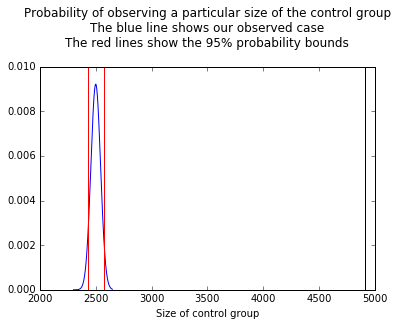

In [40]:
# Full example.
# First, generate the group
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

users = pandas.DataFrame({'id': np.arange(100**2)})
users['test_group'] = users.id.apply(lambda id: ab_split(id, 'ticket-1', 0.5))

dist = scipy.stats.binom(n=10000, p=0.25)
# Then, check that the number of users in the control group
# is a plausible size
print('Control group proportion ', (users.test_group == 'c').mean())
plt.plot(np.arange(2300, 2650), dist.pmf(np.arange(2300, 2650)))
plt.title('Probability of observing a particular size of the control group\n'
      'The blue line shows our observed case\n'
      'The red lines show the 95% probability bounds\n')
plt.xlabel('Size of control group')

plt.axvline((users.test_group == 'c').sum(), c='black')
plt.axvline(dist.isf(0.95), c='red')
plt.axvline(dist.isf(0.05), c='red')

In [42]:
users[users['test_group'] == 'c']

,id,test_group
2,2,c
3,3,c
6,6,c
8,8,c
10,10,c
12,12,c
13,13,c
15,15,c
16,16,c
17,17,c


In [44]:
print(sm.stats.Runs(np.random.choice(2, size=50)).runs_test())
# Returns 0.559265850702 (no pattern)
print(sm.stats.Runs(np.concatenate([np.zeros(25), np.ones(25)])).runs_test()[1])
# Returns 6.9552625601e-12 (strong pattern)
print(sm.stats.Runs((users.test_group == 't').values.astype('int')).runs_test()[1])
# Returns 0.455721325515 (no pattern)

(0.68448818340385131, 0.49366694856871995)
6.9552625601e-12
0.896311694662
